<a href="https://colab.research.google.com/github/jdjones91/Coding-Dojo-Machine-Learning-Projects/blob/main/Project_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# James Jones
###10-20-2022


# Project 2 - Part 4

### Cleaning and exploration of of my data set

In [3]:
# Import Libraries and load data for exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  # These are the only Libraries we need for now

### I am interested in this data set, because of my background B.S. in Emergency Medical Services. I would very much enjoy working with a healthcare company, hospital system, medical insurance company, etc. to kick off my new career.

This data set comes from Kaggle
  - https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset?resource=download

- This data set uses physiological markers to predict the stage of patient cirrhosis

- The target (y) is "Stage" (of cirrhosis)

- This is a multi-class *Classification* problem

- There are 19 Features (X) 

- There are 418 rows (Approx 19 * 418 = 7,942 data points)

In [4]:
# Load in data set and view df.head()
df = pd.read_csv('/content/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# There are some modifications tha we need to make to our data set, so let's work with a copy
c_df = df.copy()

In [6]:
# We can drop the ID rown, because it wont provide any useful information
  # We will still have the index column for row location, etc
c_df.drop(columns = 'ID', inplace = True)

In [7]:
# Take a general look at our data set
c_df.info()
  # We have a mix of object and numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [8]:
# We will have a lot of imputing to do
c_df.isna().sum().sum()

1033

In [9]:
# No duplicates
c_df.duplicated().sum()

0

In [10]:
# Take a look at outlier and gather more information
c_df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [11]:
# Age is listed as "Days", making our oldest patient 78 years old. This is normal
   # Get info on our object columns
c_df.dtypes 

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

### The next three cells were written AFTER I tried to build a Logistic Regression Model, and recieved an error

- When fitting the model on my training data, I recieved an error that my data contained NaN or infinite values. So I came back, checked my target (y) and viola, found the problem. I was clued in to the issue being in my target, because I did not recieved this erro when fitting the proprocessor to my X_train alone

- *Note: NaN values in our 'X' set will be addressed by our imputers later on*

In [12]:
c_df['Stage'].value_counts(dropna = False)
# All values are appropriate

3.0    155
4.0    144
2.0     92
1.0     21
NaN      6
Name: Stage, dtype: int64

In [13]:
# Drop NaN values
c_df.dropna(subset = ['Stage'], inplace = True)

In [14]:
# Check that they are indeed gone
c_df['Stage'].value_counts(dropna = False)

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [15]:
# No strange values here
c_df['Sex'].value_counts()

F    368
M     44
Name: Sex, dtype: int64

In [16]:
# All values are appropriate
c_df['Status'].value_counts()

C     230
D     157
CL     25
Name: Status, dtype: int64

In [17]:
# All values are appropriate
c_df['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

In [18]:
# All values are appropriate
c_df['Ascites'].value_counts()

N    288
Y     24
Name: Ascites, dtype: int64

In [19]:
# All values are appropriate
c_df['Hepatomegaly'].value_counts()

Y    160
N    152
Name: Hepatomegaly, dtype: int64

In [20]:
# All values are appropriate
c_df['Spiders'].value_counts()

N    222
Y     90
Name: Spiders, dtype: int64

In [21]:
# All values are appropriate
c_df['Edema'].value_counts()

N    348
S     44
Y     20
Name: Edema, dtype: int64

# Below, we will explore our data with visualizations

### Here is a key explaning our Columns

1) ID: unique identifier - (*We dropped this column*)

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

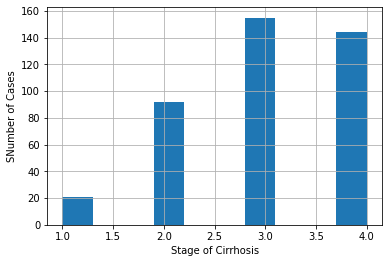

In [61]:
# Lest's visualize some our data to gather more understanding 
c_df["Stage"].hist();
plt.ylabel("Number of Cases")
plt.xlabel("Stage of Cirrhosis");
  # We can see here, that of the patients recorded, we primarily see stage 3
  # This shows some imbalance in our target (very small number of stage 1), which may need to be addressed later

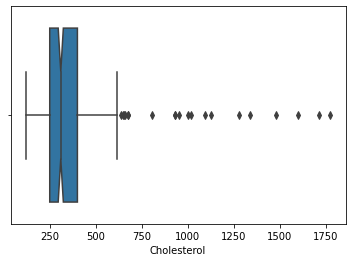

In [23]:
# Let's explore the distribution of our cholesterol levels

sns.boxplot(x = df["Cholesterol"], notch = True);
  # Our cholesterol levels are mostly between ~ 225 - 400

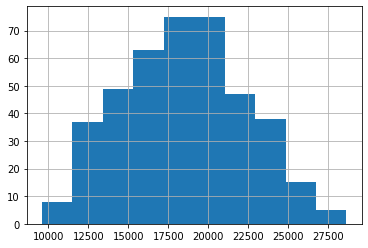

In [24]:
# And a histogram of our age (in days)
c_df["Age"].hist();
  # The age of our patients lies mostly between 15,000 - 22,500 days (41-61 years old)

### I want to add a couple multivariate visuals, because we can!

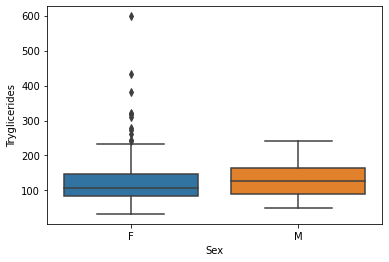

In [25]:
# Look at Sex and Tryglicerides
sns.boxplot(x = 'Sex', y = 'Tryglicerides', data = c_df);
  # This shows tha Males have higher median Trygliceride levels
  # Females have higher Trygliceride outliers 

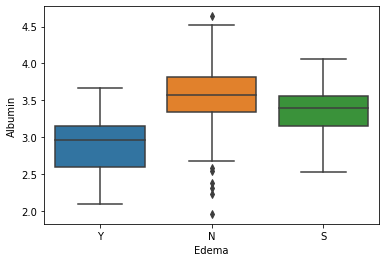

In [26]:
# Lastly, I am interested in seeing a relationship between Edema and Albumin
sns.boxplot(x = 'Edema', y = 'Albumin', data = c_df);
  # We can see that Albumin Levels are highest (Overall + highest Median) in patients with No Edema
  # We can see that Albumin is lowest overall in patients who have Edema dispite diuretic therapy

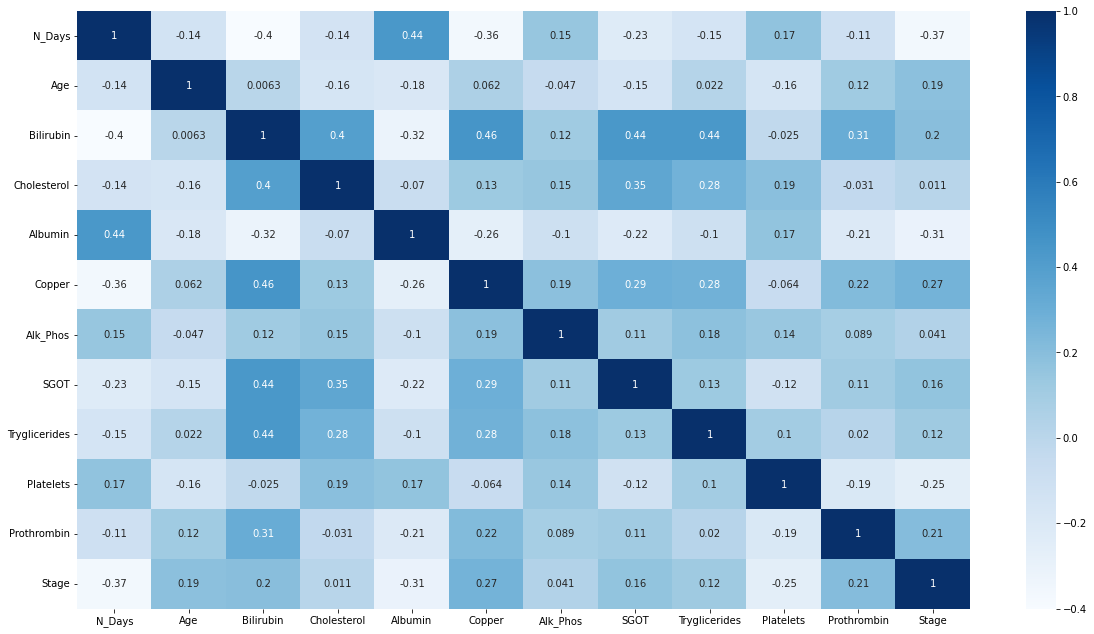

In [27]:
# Lastly, a heatmap, because they can be helpful
corr = c_df.corr()
fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(corr, cmap = "Blues", annot = True);
  # We do not see any strong correlations with our numerical data
  # In fact, there is not a single correlation >= 0.5

##We don't have any strong standout correlations, but we will be looking at the strongest correlations we have

Let's continue our analysis and explore what correlations we do see

Here are our top 5 most correlated (positive and negative) values with our target (Stage)
  - N_Days (-0.37)
  - Albumin (-0.31)
  - Copper (0.27)
  - Platelets (-0.25)
  - Prothrombin (0.21)

*This is a good example of requiring many differnt data points to make useful predictions. Since no single piece of data is strongly correlated with our target, we will need all points together to help us build a decent model*

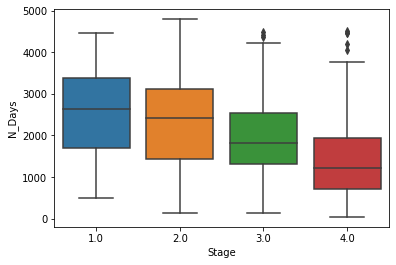

In [28]:
# Let's further visualize a couple correlated data points
sns.boxplot(x = 'Stage', y = 'N_Days', data = c_df);

As the Stage (aka severity) of cirrhosis increases, the N_Days decreases. This is probably do to expediting care for those with a more sever condition, (transplant, etc) or, due to death of the more ill patients. Although the correlation is NEGATIVE, that does not mean it doesn't have a trend

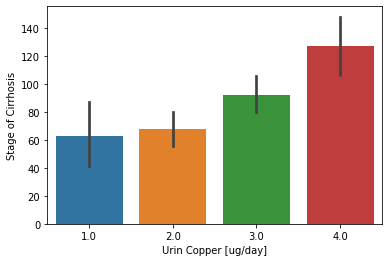

In [29]:
# Let's now view a positive correlation (although it isn't the strongest), just for comparison
sns.barplot(data = c_df, x = "Stage", y = "Copper");
plt.ylabel("Stage of Cirrhosis")
plt.xlabel("Urin Copper [ug/day]");

We can see that as the severity of cirrhosis increases, so does the amount of copper in patient's urine. Note: a POSITIVE correlation such as this, is NOT inherently beter than a negative correlation such as the one shown above

# We will now demonstrate a couple of key finding form our data

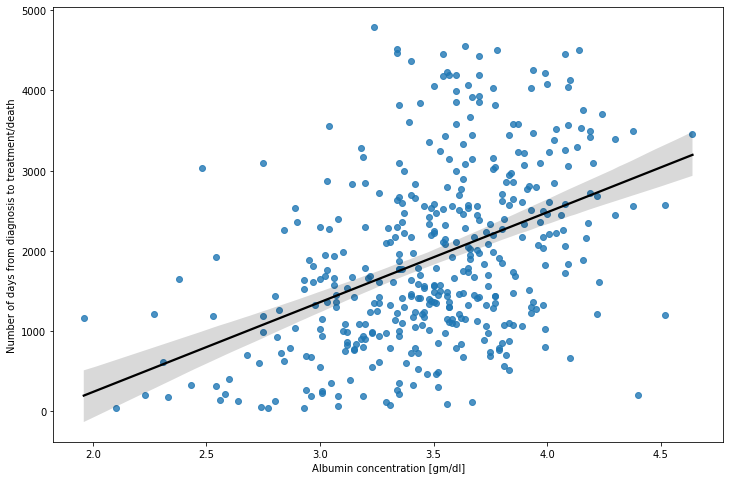

In [30]:
fig, ax = plt.subplots(figsize = (12,8))
sns.regplot(data = df, x = "Albumin", y = "N_Days",line_kws = {'color': 'black', 'ls': '-'})
plt.ylabel('Number of days from diagnosis to treatment/death')
plt.xlabel('Albumin concentration [gm/dl]');

This shows how how Albumin concentrations increase as the number of days to treatment or death increases, with the black line showing our overall trend. Now, why is this interesting? Due to the correlation of these two data points, and the correlation of N_Days to Stage, we can see that early detection of decreased Albumin could be helpful in determining a need for other tests that are indicitive of cirrhosis. Low albumin levels could clue provisers in to running other tests. This could detect cirrhosis sooner, potentially saving patints from developing worsened cirrhosis.

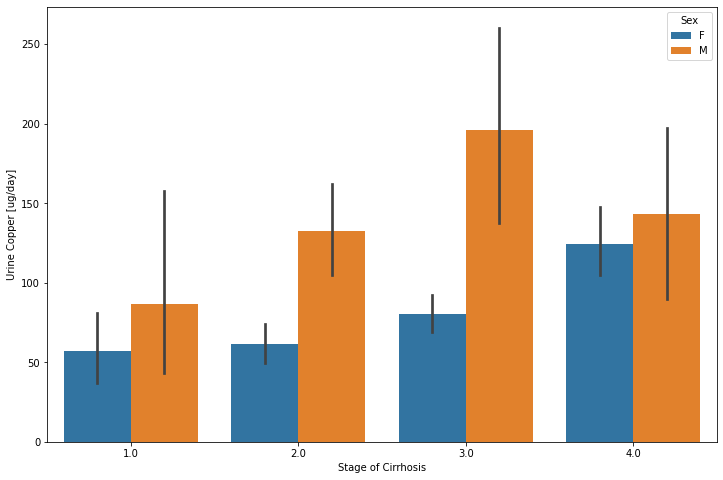

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = 'Stage',y = 'Copper', data = c_df,
            hue = 'Sex')
plt.xlabel('Stage of Cirrhosis')
plt.ylabel('Urine Copper [ug/day]')
plt.show()

Above, we see how urine copper concentrations trend up as the severity of Cirrhosis increases. This means that detecting elevated copper in patients early could helpm with cirrosis detection. Here, we can see the differnce between male an female patients, with males having consistently higher levels of urinary copper. This could lead us to determine that either a. Men show more excreated copper when cirrhotic and can be flagged as ill more easily, or, b. The baseline comparison of urinary copper can be set higher to avoid false negatives. This determination would require further investigation. Ultimately, increased urinary copper concentrations can help medical providers detect cirrosis, and potentially seveity of cirrhosis, ultimately leading to earlier treatment of patients saving time, money, and heartache on both sides (the Medical Providers and Patient/Family)

# Now, we will build and tune several predictive models and attemp to find our best model for deployment. This will have to strike a balance between accuracy and speed

In [32]:
# Load in necessary Libraries, keeping in mind we have already loaded several in above
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn import set_config # To create simple diagrams showing our processing steps
set_config(display='diagram')  # This is personal preference

In [33]:
# Instantiate all models, transformers, etc 
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
most_freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')
rf = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
  # Choosing to stratify 'y' because of the imbalance in our targets

We will build a Logistic Regression, K Nearest Neighbors, and Random Forest model. We will tune the models, then we will apply PCA to see if we can positively affect efficacy and/or speed of our model. We have pretty straight forward pre-processing steps to follow for this, so I don't see a necessity for further feature engineering (not datetime, overload operators, etc). 

- Note: Although we could apply an overload operator to our age column (x / 365) to find our age in days, this will not have an affect on our model since the data will be scaled

In [34]:
# Train Test Split our data
X = c_df.drop(columns = 'Stage')
y = c_df['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [35]:
# Time to create a preprocessor to normalize our data. 
  # We will Impute, OneHotEncode, and Scale
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [36]:
# Instantiate numeric pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [37]:
# Instantiate categorical pipeline
cat_pipe = make_pipeline(most_freq_imputer,ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [38]:
# Create two tuples to insert in the column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [39]:
# Create a column transformer and name it (for consistency, I'll name it 'preproccessor)
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3acda90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3513150>)])

In [40]:
# Now will will fit the preprocessor to our data, and transform it
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3acda90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3513150>)])

In [41]:
# I just like to check the shape to make sure I'm on track
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed.shape

(309, 27)

# We will now build and tune our 3 models. Models were chosen because they all operate differently

In [42]:
# Logistic Regression
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3acda90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3513150>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [43]:
# Fit and assess scores
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.5889967637540453
0.5145631067961165


In [44]:
# K Nearest Neighbors
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)
print(knn_pipe.score(X_train, y_train))
print(knn_pipe.score(X_test, y_test))

0.6407766990291263
0.4563106796116505


In [45]:
# Random Forest
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
print(rf_pipe.score(X_train, y_train))
print(rf_pipe.score(X_test, y_test))

1.0
0.46601941747572817


## Interestingly, Logistic Regression, while having the lowest training score, actually has the highest testing score

- Let's tune our models to determine which is the best

In [46]:
logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3acda90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [47]:
# This was addapted from "Enrique Benito Casado" on Stack Overflow:
  # https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn

logreg_pipe_2 = make_pipeline(preprocessor, LogisticRegression(max_iter = 10000, random_state = 42))
  # Max iteration were reached when initially running this model at 'max_iter= 1000', 
    # Therefore, I increased it to '10,000'
logreg_params = [{'logisticregression__solver': ['saga'], # 'saga' chosen because it handles both 'l1', and 'l2'
                  'logisticregression__penalty':['l1', 'l2'],
                  'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100]}]



logreg_grid_search = GridSearchCV(estimator = logreg_pipe_2,  
                           param_grid = logreg_params,
                           scoring = 'accuracy')

# Get oput our best parameters for our Logistical Regression Model
logreg_grid_search.fit(X_train, y_train)
logreg_grid_search.best_params_

{'logisticregression__C': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [48]:
# Make, fit, and generate scores for our best Logistic Regression model
logreg_best = LogisticRegression(C = 1, solver = 'saga', penalty = 'l1', random_state = 42, max_iter = 10000)
logreg_best_pipe = make_pipeline(preprocessor, logreg_best)
logreg_best_pipe.fit(X_train, y_train)
print(logreg_best_pipe.score(X_train, y_train))
print(logreg_best_pipe.score(X_test, y_test))

0.5922330097087378
0.5242718446601942


## We successfully increased our testing accuracy by  1%
- Perhaps we'll have more increased performance hyperparameter tuning our other 2 models

In [49]:
# Get knn parameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3acda90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [50]:
# Let's tune weight, n_neighbors, and p
knn_params = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__leaf_size': [10,20,30,40,50],
              'kneighborsclassifier__weights': ['distance','uniform']}

In [51]:
# We will find our best parameters using the Scikit_Learn Grid Search
knn_grid_search = GridSearchCV(knn_pipe, knn_params)

# This is a slightly different approach
knn_grid_search.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_grid_search.best_params_)
knn_best = knn_grid_search.best_estimator_
print(f'Accuracy of best KNN model is: {knn_best.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 3, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.4368932038834951


### Our deafualt KNN model is our best, so we will stay with that

In [52]:
# Get parameters for Random Forest
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f79b3acda90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [53]:
# Let's try tuning our n_estimators, depth, and min_samples_leaf
rf_params = {'randomforestclassifier__max_depth': [1,2,3],
             'randomforestclassifier__min_samples_leaf': [1,3,5],
             'randomforestclassifier__min_samples_split': [2,3,4],
             'randomforestclassifier__n_estimators': [50, 100, 150]}

# Instantiate GridSearchCV and get best parameters
rf_grid_search = GridSearchCV(rf_pipe, rf_params)
rf_grid_search.fit(X_train, y_train)
rf_grid_search.best_params_

{'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 100}

In [66]:
rf_best = RandomForestClassifier(random_state = 42, max_depth = 1, min_samples_leaf = 1, n_estimators = 100, min_samples_split = 2)
rf_best_pipe = make_pipeline(preprocessor, rf_best)
rf_best_pipe.fit(X_train, y_train)
print(rf_best_pipe.score(X_test, y_test))

0.5242718446601942


## Our Random Forest model accuracy increased significantly compared to our other two models.
- It does, hoever, have the same score as our logistic regression
- Therefore, we will apply PCA to both our Random Forest, and Logistic Regression, and see which is best

In [55]:
# Load in PCA librarie
from sklearn.decomposition import PCA

# Now we need to fit PCA on our pre-processed data
pca = PCA()
pca.fit(X_train_transformed)  # This was done prior to our model building

PCA()

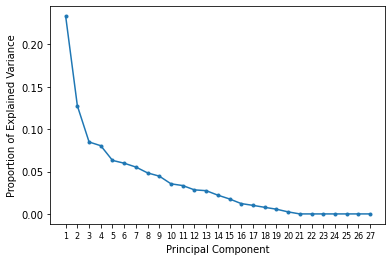

In [56]:
# Make a plot to determine our best number of principal components
plt.plot(range(1, 28), pca.explained_variance_ratio_, marker = '.')
  # We have 27 columns in our features (X)
plt.xticks(ticks = range(1, 28), fontsize = 8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

We are looking for an "elbow", or bend in the graph where the explained variance begins to level out. In this graph seems like we could call this 5, 10, 12, or 16. For our purposes here, we will call it 16. This will reduce our components, but not lose a ton of potentially useful data (since these models really needs everything we can give them)

In [57]:
# Instantiate best PCA
pca_best = PCA(n_components = 16)

# Insert it in a transformer
transformer = make_pipeline(preprocessor, pca_best)

In [58]:
# Run Logistic Regression (with our best parameters) with our transforemer (PCA) addition
%%time

logreg_pca_pipe = make_pipeline(transformer, logreg_best)
logreg_pca_pipe.fit(X_train, y_train)
print(logreg_pca_pipe.score(X_train, y_train))
print(logreg_pca_pipe.score(X_test, y_test))

0.5728155339805825
0.5339805825242718
CPU times: user 105 ms, sys: 0 ns, total: 105 ms
Wall time: 116 ms


###This marginally improved our accuracy, and it performed very quickly

In [59]:
# Repeat with our Random Forest Model
%%time

rf_pca_pipe = make_pipeline(transformer, rf_best)
rf_pca_pipe.fit(X_train, y_train)
print(rf_pca_pipe.score(X_train, y_train))
print(rf_pca_pipe.score(X_test, y_test))

0.5307443365695793
0.5533980582524272
CPU times: user 338 ms, sys: 0 ns, total: 338 ms
Wall time: 420 ms


### This increased our score a little more than it did for Logistic Regression. Although slower, it is only by milliseconds
- We will run a full classification report on both to get a better idea of which is trul better. Keep in mind that things like false positives and false negatives have a roll to play, especially in medical diagnosis models. 

In [60]:
# Generate predictions and classification reports
logreg_preds = logreg_pca_pipe.predict(X_test)
rf_preds = rf_pca_pipe.predict(X_test)

# Collect our classification reports
print('Classification report for best Logistic Regression:')
print('\n')
print(classification_report(y_test, logreg_preds))
print('\n')
print('Classification report for best Random Forest Model:')
print('\n')
print(classification_report(y_test, rf_preds))

Classification report for best Logistic Regression:


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.33      0.17      0.23        23
         3.0       0.45      0.64      0.53        39
         4.0       0.72      0.72      0.72        36

    accuracy                           0.53       103
   macro avg       0.38      0.38      0.37       103
weighted avg       0.50      0.53      0.50       103



Classification report for best Random Forest Model:


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00        23
         3.0       0.49      0.92      0.64        39
         4.0       0.72      0.58      0.65        36

    accuracy                           0.55       103
   macro avg       0.30      0.38      0.32       103
weighted avg       0.44      0.55      0.47       103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# Final model to put into production: Logistical Regression:
  - Hyperparameters: C = 1, solver = 'saga', penalty = 'l1', random_state = 42, max_iter = 10000
    - With the addition of PCA(n_components = 16)


## The reason behind this is simple: this generates the most balanced predictions.

While accuracy was higher in our Random Forest, and it did show a great recall score of 92% when predicting stage 3 cirrhosis, it did NOT have any predictive data for stage 1 or 2 cirrhosis. This implies that this model miss-predicted all stage 1 and stage 2 patients, leaving a large gap. 

While the Logistic Regression model is still poor, it has the most balance in predictions, and is incredibly quick. 

This model could be put into practice only as a way to increase the amount of data fed into the model, and to increase it's reliability over time. This should NOT be relied on to make clinical predictions.

**This models performance can be improved by gathering more data, and adding more highly correlated data points (chemical blood concentrations, co-morbidities, etc), with the help of a subject matter expert.**
- This model, to be truly successful, needs more information correlated to stage 1 and stage 2 cirrhosis. As is the case with all medical condition, the earlier the diagnosis, the better.